In [28]:
import locmofitpy2
import pandas as pd

data = pd.read_csv("data/simulated_data_npc.csv")
locs = data.values[:, 0:3]
loc_precs = data.values[:, 3:]

In [29]:
# %%timeit
res = locmofitpy2.run_locmofit(
    "NuclearPoreComplex",
    locs,
    loc_precs,
    init_params={"z2": 10, "r1": 10, "theta2": 0, "phi2": 0},
    freeze=("r2", "theta2", "phi2"),
    max_iter=200,
    spacing=3.0,
    tol=1e-6,
)

In [30]:
print(res["losses"][-1], res["losses"].shape[0])

738.6953 200


In [31]:
res["parameters"]

{'phi1': -4.066671848297119,
 'phi2': 0.0,
 'r1': 49.858367919921875,
 'r2': 1.0,
 'theta1': 0.400026798248291,
 'theta2': 0.0,
 'x1': 0.9556522369384766,
 'x2': -1.7605910301208496,
 'y1': 1.241917610168457,
 'y2': 0.35811570286750793,
 'z1': -0.13317325711250305,
 'z2': 50.11111831665039}

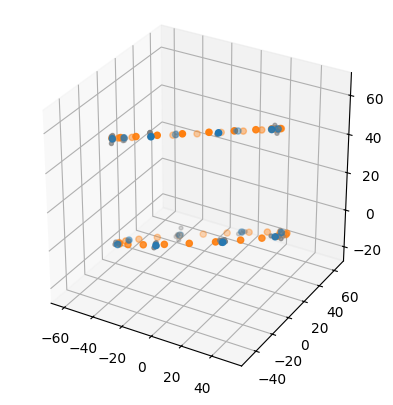

In [19]:
import numpy as np
import matplotlib.pyplot as plt

ground_truth = pd.read_csv("data/ground_truth_npc.csv")

positions = np.array(res["model_points"])  # converts JAX array -> NumPy array on host

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_box_aspect((1, 1, 1))
ax.scatter(data["x"], data["y"], data["z"], c="gray", s=8)  # type: ignore[arg-type]
ax.scatter(ground_truth["x"], ground_truth["y"], ground_truth["z"])  # type: ignore[arg-type]
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2])  # type: ignore[arg-type]

plt.show()
